In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import parallel_coordinates
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('av_datasets/nyc_taxi_trip_duration.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [7]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [8]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [10]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

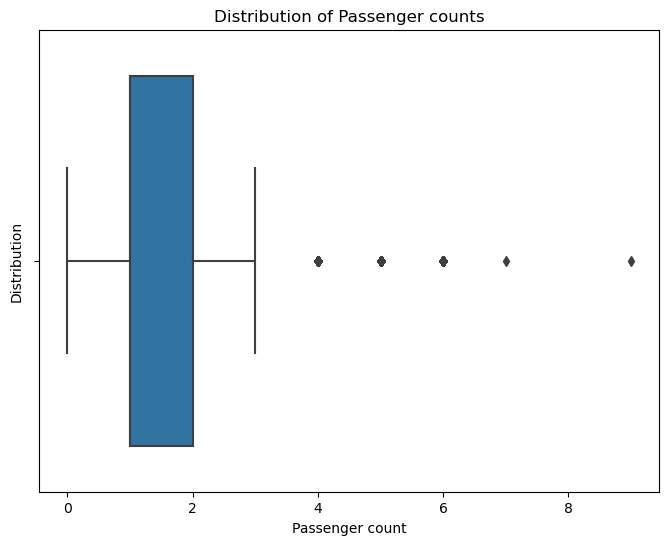

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='passenger_count')
plt.xlabel('Passenger count')
plt.ylabel('Distribution')
plt.title('Distribution of Passenger counts')
plt.show()

**Explore the potential outliers in the Passenger counts feature**

In [12]:
# Calculate Interquartile Range (IQR) for passenger_count
Q1 = data['passenger_count'].quantile(0.25)
Q3 = data['passenger_count'].quantile(0.75)

IQR = Q3 - Q1

# Identify potential outliers (values below 1.5 IQR from Q1 or above 1.5 IQR from Q3)
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = data[(data['passenger_count'] < lower_bound) | (data['passenger_count'] > upper_bound)]

In [13]:
lower_bound, upper_bound

(-0.5, 3.5)

In [14]:
# Print outliers and their counts
print("Passenger count outliers:")
print(outliers['passenger_count'].value_counts(ascending=False).to_string())

Passenger count outliers:
5    38926
6    24107
4    14050
7        1
9        1


In [15]:
outliers.shape

(77085, 11)

In [16]:
print("Total Non-outlier data in the dataframe for the Passenger counts feature are : ", data.shape[0] - outliers.shape[0])

Total Non-outlier data in the dataframe for the Passenger counts feature are :  652237


Distribution of the data in #Passenger Count# feature.

0           33
1           517415
2           105097
3           29692
Outliers    77085

In [17]:
# Define bounds based on domain knowledge or IQR analysis (e.g., from previous steps)
lower_bound = 1 # Your lower bound value (e.g., minimum number of passengers possible)
upper_bound = 6 # Your upper bound value (e.g., maximum capacity of a taxi)

# Cap outliers using defined bounds
data['capped_data'] = data.passenger_count.clip(lower=lower_bound, upper=upper_bound)

In [18]:
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,capped_data
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,6
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,1


In [19]:
# Rename "capped_data" column to "passenger_counts"
data = data.rename(columns={"capped_data": "passenger_counts"})

# Drop the original "passenger_count" column
data = data.drop("passenger_count", axis=1)

In [20]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,passenger_counts
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,-73.953918,40.778873,-73.963875,40.771164,N,400,1
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,-73.988312,40.731743,-73.994751,40.694931,N,1100,2
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,-73.997314,40.721458,-73.948029,40.774918,N,1635,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,-73.961670,40.759720,-73.956779,40.780628,N,1141,6
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,-74.017120,40.708469,-73.988182,40.740631,N,848,1


In [21]:
trip_duration_end_pos = data['trip_duration']
data.drop('trip_duration', axis=1, inplace=True)
data['trip_duration'] = trip_duration_end_pos

In [22]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,passenger_counts,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,-73.953918,40.778873,-73.963875,40.771164,N,1,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,-73.988312,40.731743,-73.994751,40.694931,N,2,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,-73.997314,40.721458,-73.948029,40.774918,N,2,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,-73.961670,40.759720,-73.956779,40.780628,N,6,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,-74.017120,40.708469,-73.988182,40.740631,N,1,848


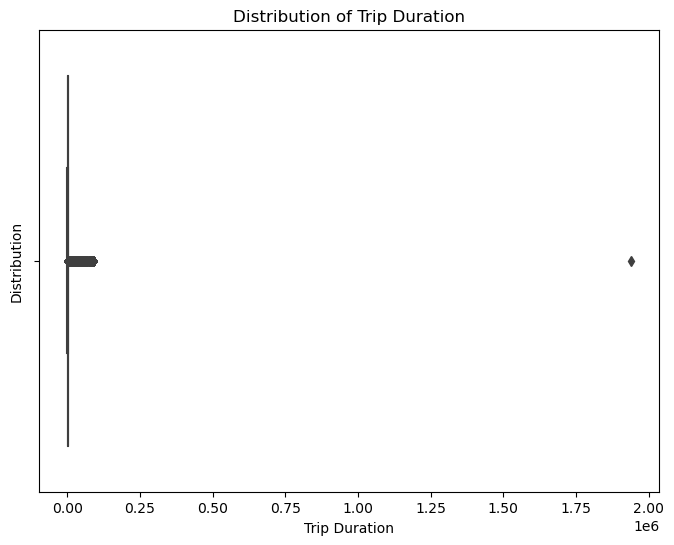

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='trip_duration')
plt.xlabel('Trip Duration')
plt.ylabel('Distribution')
plt.title('Distribution of Trip Duration')
plt.show()

Explore the potential outliers in the **Trip Duration** feature.

In [24]:
# Calculate Interquartile Range (IQR) for Trip duration
Q1_td = data['trip_duration'].quantile(0.25)
Q2_td = data['trip_duration'].quantile(0.50)
Q3_td = data['trip_duration'].quantile(0.75)

IQR_td = Q3_td - Q1_td

# Identify potential outliers (values below 1.5 IQR from Q1 or above 1.5 IQR from Q3)
lower_bound_td = Q1_td - (1.5 * IQR_td)
upper_bound_td = Q3_td + (1.5 * IQR_td)

outliers_td = data[(data['trip_duration'] < lower_bound_td) | (data['trip_duration'] > upper_bound_td)]

In [25]:
lower_bound_td, upper_bound_td

(-620.0, 2092.0)

In [26]:
outliers_td.shape

(36963, 11)

In [27]:
outliers_td

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,passenger_counts,trip_duration
15,id2930166,2,2016-02-21 01:56:14,2016-02-22 01:52:18,-74.002876,40.734131,-73.955399,40.767502,N,1,86164
26,id1766292,1,2016-06-26 14:50:05,2016-06-26 15:29:15,-74.000168,40.758141,-73.947266,40.764793,N,2,2350
42,id1100632,1,2016-03-02 16:29:40,2016-03-02 17:06:09,-73.997459,40.724735,-73.954414,40.669811,N,1,2189
55,id3695961,1,2016-05-30 23:04:00,2016-05-30 23:42:00,-73.984367,40.760208,-73.913246,40.686783,N,1,2280
74,id3204761,2,2016-06-03 17:29:49,2016-06-03 18:05:40,-74.006973,40.675991,-73.949379,40.717659,N,1,2151
...,...,...,...,...,...,...,...,...,...,...,...
729221,id2450253,2,2016-01-28 23:14:37,2016-01-28 23:59:04,-73.979088,40.755871,-73.949471,40.594769,N,1,2667
729232,id1609346,2,2016-06-18 00:43:21,2016-06-18 01:38:03,-73.999741,40.728352,-73.964348,40.760529,N,1,3282
729273,id2884987,2,2016-04-11 10:37:59,2016-04-11 11:31:45,-73.782272,40.644493,-74.009514,40.713406,N,2,3226
729276,id0592933,1,2016-06-09 19:12:34,2016-06-09 19:53:59,-73.964828,40.757729,-73.790283,40.643536,N,1,2485


In [28]:
min(data['trip_duration']), max(data['trip_duration'])

(1, 1939736)

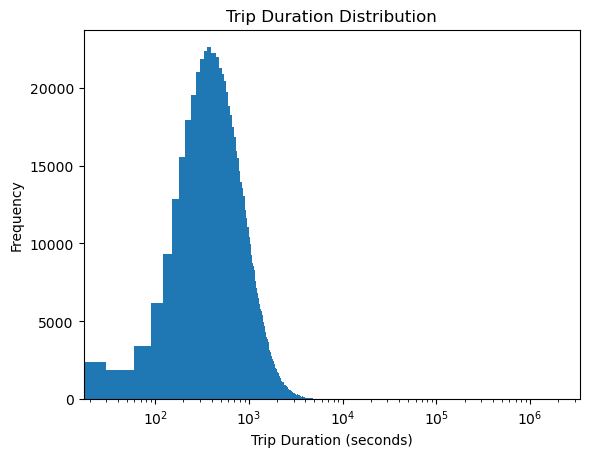

In [29]:
plt.hist(data['trip_duration'], bins=range(0, max(data['trip_duration']), 30))
plt.xscale('log')  # Logarithmic scale on the x-axis
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Trip Duration Distribution')
plt.show()

In [30]:
data[(data['trip_duration'] > 2100) & (data['trip_duration'] < 4200)]

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,passenger_counts,trip_duration
26,id1766292,1,2016-06-26 14:50:05,2016-06-26 15:29:15,-74.000168,40.758141,-73.947266,40.764793,N,2,2350
42,id1100632,1,2016-03-02 16:29:40,2016-03-02 17:06:09,-73.997459,40.724735,-73.954414,40.669811,N,1,2189
55,id3695961,1,2016-05-30 23:04:00,2016-05-30 23:42:00,-73.984367,40.760208,-73.913246,40.686783,N,1,2280
74,id3204761,2,2016-06-03 17:29:49,2016-06-03 18:05:40,-74.006973,40.675991,-73.949379,40.717659,N,1,2151
78,id2719888,2,2016-01-06 22:22:08,2016-01-06 23:06:47,-73.976952,40.747292,-73.776283,40.645531,N,1,2679
...,...,...,...,...,...,...,...,...,...,...,...
729221,id2450253,2,2016-01-28 23:14:37,2016-01-28 23:59:04,-73.979088,40.755871,-73.949471,40.594769,N,1,2667
729232,id1609346,2,2016-06-18 00:43:21,2016-06-18 01:38:03,-73.999741,40.728352,-73.964348,40.760529,N,1,3282
729273,id2884987,2,2016-04-11 10:37:59,2016-04-11 11:31:45,-73.782272,40.644493,-74.009514,40.713406,N,2,3226
729276,id0592933,1,2016-06-09 19:12:34,2016-06-09 19:53:59,-73.964828,40.757729,-73.790283,40.643536,N,1,2485


*So, we would consider the records which have Trip duration less than 70 minutes. The rest have been considered as outliers after ding permutations with the no. of records for various trip durations (ignoring the outliers value via IQR.*

In [31]:
data = data[data['trip_duration'] < 4200]

In [32]:
data.reset_index(drop=True, inplace=True)

In [33]:
data.shape

(725886, 11)

In [34]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,passenger_counts,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,-73.953918,40.778873,-73.963875,40.771164,N,1,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,-73.988312,40.731743,-73.994751,40.694931,N,2,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,-73.997314,40.721458,-73.948029,40.774918,N,2,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,-73.961670,40.759720,-73.956779,40.780628,N,6,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,-74.017120,40.708469,-73.988182,40.740631,N,1,848


In [35]:
import math
from math import radians, sin, cos, asin, sqrt

In [36]:
def haversine_distance(lon1, lat1, lon2, lat2):
    # convert to radians
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)
    
    rad_earth_km = 6371  # Earth radius in kilometers
    
    # distance between latitudes and longitudes
    dLon = (lon2 - lon1)
    dLat = (lat2 - lat1)
    
    a = np.sin(dLat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return rad_earth_km * c

In [37]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
passenger_counts               int64
trip_duration                  int64
dtype: object

In [38]:
# Calculate distance using Haversine formula
data['distance_km'] = haversine_distance(data['pickup_longitude'].values, data['pickup_latitude'].values, data['dropoff_longitude'].values, data['dropoff_latitude'].values)

In [39]:
data['distance_km'] = round(data['distance_km'], 2)

In [40]:
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,passenger_counts,trip_duration,distance_km
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,-73.953918,40.778873,-73.963875,40.771164,N,1,400,1.20
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,-73.988312,40.731743,-73.994751,40.694931,N,2,1100,4.13
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,-73.997314,40.721458,-73.948029,40.774918,N,2,1635,7.25
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,-73.961670,40.759720,-73.956779,40.780628,N,6,1141,2.36
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,-74.017120,40.708469,-73.988182,40.740631,N,1,848,4.33


In [41]:
data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

In [42]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,passenger_counts,trip_duration,distance_km
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,N,1,400,1.20
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,N,2,1100,4.13
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,N,2,1635,7.25
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,N,6,1141,2.36
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,N,1,848,4.33


Now, calculate trip duration by hour of a day.

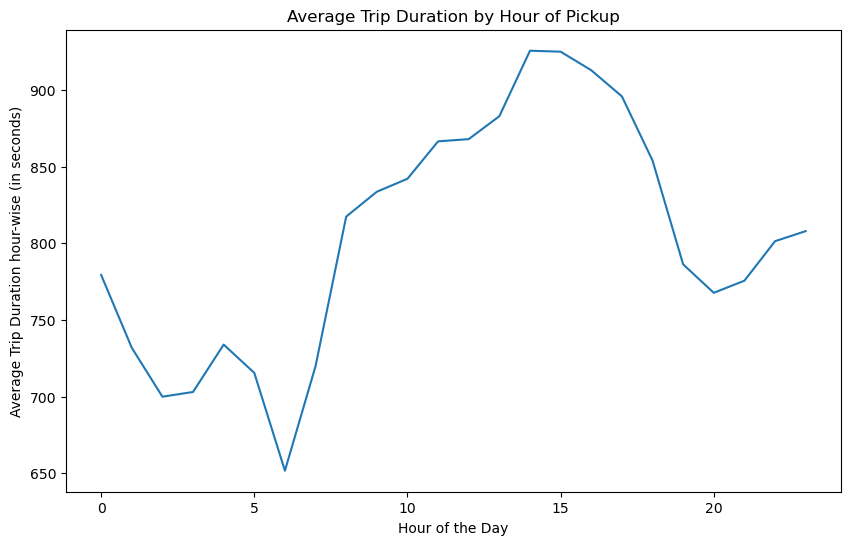

In [43]:
# Calculate average trip duration by hour
data['pickup_hour'] = data['pickup_datetime'].dt.hour
avg_trip_duration_by_hour = data.groupby('pickup_hour')['trip_duration'].mean()

# Plot average trip duration vs hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_trip_duration_by_hour.index, y=avg_trip_duration_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration hour-wise (in seconds)')
plt.title('Average Trip Duration by Hour of Pickup')
plt.show()

In [44]:
# Convert the Series to a DataFrame (resetting the index to become columns). Print the DataFrame (tabular format)
print(avg_trip_duration_by_hour.to_frame(name='Average Trip Duration hour-wise (in seconds)'))

             Average Trip Duration hour-wise (in seconds)
pickup_hour                                              
0                                              779.406119
1                                              731.866771
2                                              699.917139
3                                              702.988552
4                                              733.925499
5                                              715.454473
6                                              651.590810
7                                              719.872043
8                                              817.473135
9                                              833.688128
10                                             842.165492
11                                             866.582712
12                                             868.037639
13                                             883.004539
14                                             925.749817
15            

We can clearly infer that the trip duration takes most of the time between *1 pm and 5 pm*. Whereas, the least trip duration happens at the early morning around *6 am*.

In [45]:
data['pickup_weekday'] = data['pickup_datetime'].dt.day_name()

In [46]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,passenger_counts,trip_duration,distance_km,pickup_hour,pickup_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,N,1,400,1.20,16,Monday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,N,2,1100,4.13,23,Friday
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,N,2,1635,7.25,17,Sunday
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,N,6,1141,2.36,9,Tuesday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,N,1,848,4.33,6,Wednesday


In [47]:
# Define the order of weekdays
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [48]:
# Calculate average trip duration by weekday
avg_trip_duration_by_pickup_weekday = data.groupby('pickup_weekday')['trip_duration'].mean()

# Reindex the Series to ensure the desired order of weekdays
avg_trip_duration_by_pickup_weekday = avg_trip_duration_by_pickup_weekday.reindex(weekdays_order)

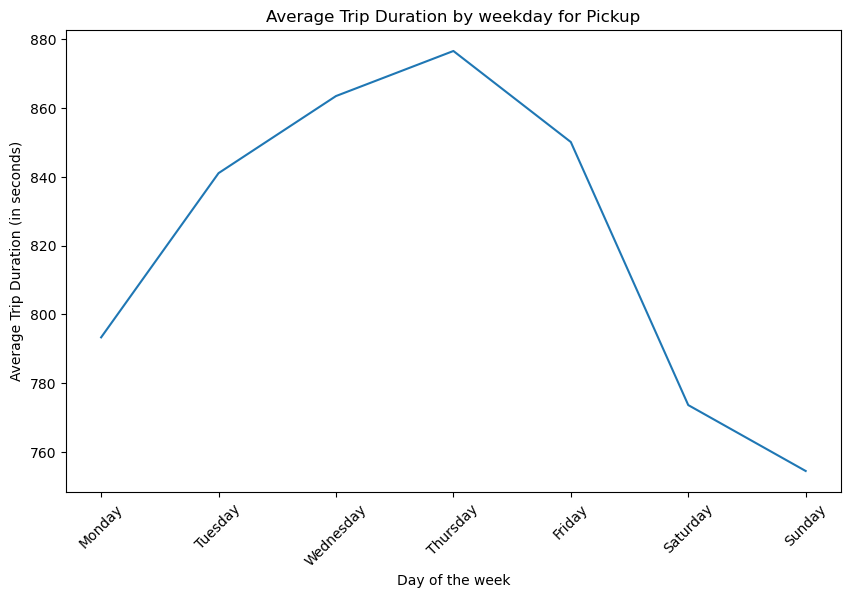

In [49]:
# Plot average trip duration against weekdays
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_trip_duration_by_pickup_weekday.index, y=avg_trip_duration_by_pickup_weekday.values)
plt.xlabel('Day of the week')
plt.ylabel('Average Trip Duration (in seconds)')
plt.title('Average Trip Duration by weekday for Pickup')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We could clearly see that the time duraion increases from *Monday* to *Thurday*, dips on *Friday* a little bit and then drops drastically down on *Saturday* and *Sunday*.

In *Thursday*, taking a Taxi will not be a good option because it is the most time taking day, whereas Weekends are the best time to travel via Taxis in New York.

In [50]:
data.store_and_fwd_flag.value_counts()

N    721917
Y      3969
Name: store_and_fwd_flag, dtype: int64

In [51]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,passenger_counts,trip_duration,distance_km,pickup_hour,pickup_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,N,1,400,1.20,16,Monday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,N,2,1100,4.13,23,Friday
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,N,2,1635,7.25,17,Sunday
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,N,6,1141,2.36,9,Tuesday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,N,1,848,4.33,6,Wednesday


In [52]:
data['vendor_id'].value_counts()

2    388118
1    337768
Name: vendor_id, dtype: int64

In [53]:
data_new = data[['vendor_id', 'passenger_counts', 'distance_km', 'pickup_hour', 'pickup_weekday', 'trip_duration']]

In [54]:
data_new.head()

,vendor_id,passenger_counts,distance_km,pickup_hour,pickup_weekday,trip_duration
0,2,1,1.20,16,Monday,400
1,1,2,4.13,23,Friday,1100
2,2,2,7.25,17,Sunday,1635
3,2,6,2.36,9,Tuesday,1141
4,1,1,4.33,6,Wednesday,848


In [55]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725886 entries, 0 to 725885
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vendor_id         725886 non-null  int64  
 1   passenger_counts  725886 non-null  int64  
 2   distance_km       725886 non-null  float64
 3   pickup_hour       725886 non-null  int64  
 4   pickup_weekday    725886 non-null  object 
 5   trip_duration     725886 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 33.2+ MB


In [56]:
# Convert vendor_id to categorical variable
data_new['vendor_id'] = data_new['vendor_id'].astype('category')

In [57]:
# Define the dictionary mapping for pickup_weekday
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Convert pickup_weekday using the dictionary mapping
data_new['pickup_weekday'] = data_new['pickup_weekday'].map(weekday_mapping)

In [58]:
data_new.head()

,vendor_id,passenger_counts,distance_km,pickup_hour,pickup_weekday,trip_duration
0,2,1,1.20,16,1,400
1,1,2,4.13,23,5,1100
2,2,2,7.25,17,7,1635
3,2,6,2.36,9,2,1141
4,1,1,4.33,6,3,848


In [59]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725886 entries, 0 to 725885
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   vendor_id         725886 non-null  category
 1   passenger_counts  725886 non-null  int64   
 2   distance_km       725886 non-null  float64 
 3   pickup_hour       725886 non-null  int64   
 4   pickup_weekday    725886 non-null  int64   
 5   trip_duration     725886 non-null  int64   
dtypes: category(1), float64(1), int64(4)
memory usage: 28.4 MB


Converting *Pickup hour* and *Pickup Weekday* to categorical type as there is no linear relationship between each of the 2 features with #Trip Duration#.

In [60]:
data_new.pickup_weekday = data_new.pickup_weekday.astype('category')

In [61]:
data_new.pickup_hour = data_new.pickup_hour.astype('category')

In [62]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725886 entries, 0 to 725885
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   vendor_id         725886 non-null  category
 1   passenger_counts  725886 non-null  int64   
 2   distance_km       725886 non-null  float64 
 3   pickup_hour       725886 non-null  category
 4   pickup_weekday    725886 non-null  category
 5   trip_duration     725886 non-null  int64   
dtypes: category(3), float64(1), int64(2)
memory usage: 18.7 MB


In [63]:
data_new.passenger_counts.value_counts()

1    515298
2    104460
5     38690
3     29513
6     23955
4     13970
Name: passenger_counts, dtype: int64

We are encoding the *passenger_counts* feature as it maintains an order with respect to the number of passengers. Hence, we are implementing "Label Encoding" on this feature.

In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the passenger_counts column
data_new['passenger_count'] = le.fit_transform(data_new['passenger_counts'])

In [65]:
# Print the mapping between original categories and encoded labels
print("Mapping of original categories to encoded labels:")
for category, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{category}: {label}")

Mapping of original categories to encoded labels:
1: 0
2: 1
3: 2
4: 3
5: 4
6: 5


In [66]:
data_new = data_new.drop(['passenger_counts'], axis=1)

In [67]:
data_new.head()

,vendor_id,distance_km,pickup_hour,pickup_weekday,trip_duration,passenger_count
0,2,1.20,16,1,400,0
1,1,4.13,23,5,1100,1
2,2,7.25,17,7,1635,1
3,2,2.36,9,2,1141,5
4,1,4.33,6,3,848,0


In [68]:
trip_duration_end_pos1 = data_new['trip_duration']
data_new.drop('trip_duration', axis=1, inplace=True)
data_new['trip_duration'] = trip_duration_end_pos1

In [69]:
data_new.head()

,vendor_id,distance_km,pickup_hour,pickup_weekday,passenger_count,trip_duration
0,2,1.20,16,1,0,400
1,1,4.13,23,5,1,1100
2,2,7.25,17,7,1,1635
3,2,2.36,9,2,5,1141
4,1,4.33,6,3,0,848


In [70]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725886 entries, 0 to 725885
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   vendor_id        725886 non-null  category
 1   distance_km      725886 non-null  float64 
 2   pickup_hour      725886 non-null  category
 3   pickup_weekday   725886 non-null  category
 4   passenger_count  725886 non-null  int64   
 5   trip_duration    725886 non-null  int64   
dtypes: category(3), float64(1), int64(2)
memory usage: 18.7 MB


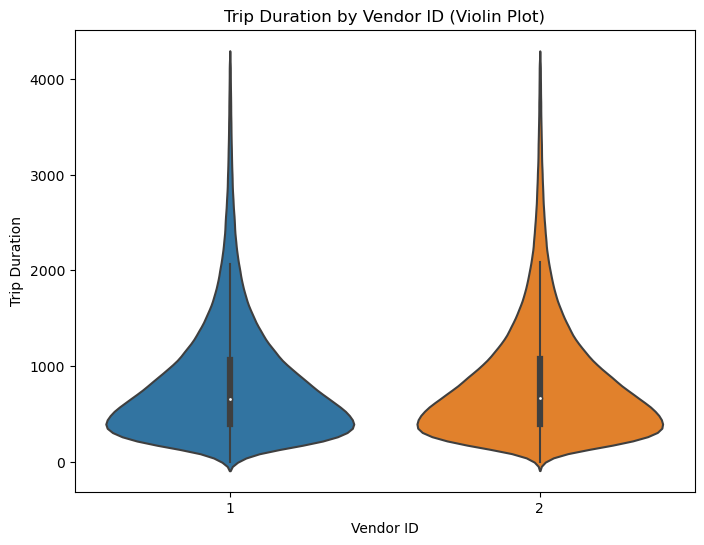

In [71]:
# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='vendor_id', y='trip_duration', data=data_new)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Vendor ID (Violin Plot)')
plt.show()

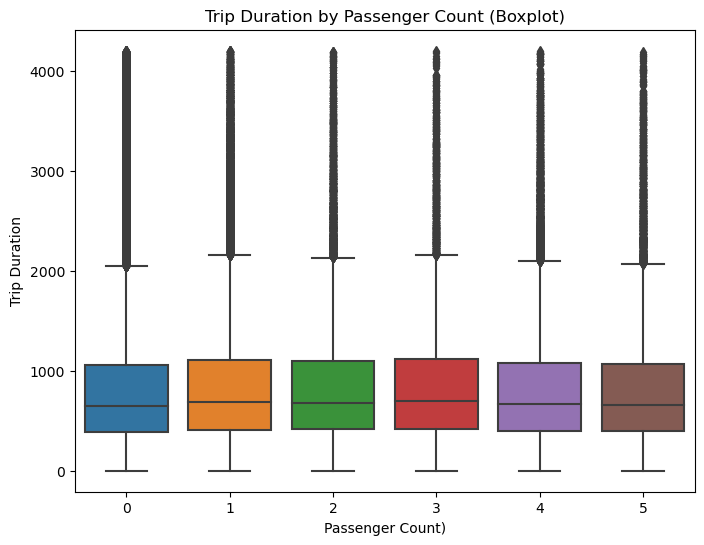

In [72]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='trip_duration', data=data_new)
plt.xlabel('Passenger Count)')
plt.ylabel('Trip Duration')
plt.title('Trip Duration by Passenger Count (Boxplot)')
plt.show()

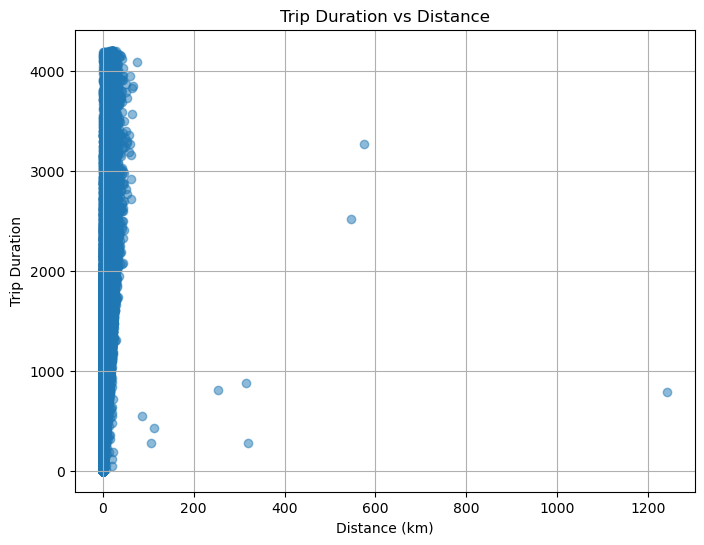

In [73]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_new['distance_km'], data_new['trip_duration'], alpha=0.5)
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration')
plt.title('Trip Duration vs Distance')
plt.grid(True)
plt.show()

In [74]:
data_new.head()

,vendor_id,distance_km,pickup_hour,pickup_weekday,passenger_count,trip_duration
0,2,1.20,16,1,0,400
1,1,4.13,23,5,1,1100
2,2,7.25,17,7,1,1635
3,2,2.36,9,2,5,1141
4,1,4.33,6,3,0,848


Test Multicollinearity of the independent variables using Variance Inflation Factor (VIF)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [76]:
# Define independent variables
X = data_new[['vendor_id', 'distance_km', 'pickup_hour', 'pickup_weekday', 'passenger_count']]

# Add constant term to independent variables
X = sm.add_constant(X)

# Define dependent variable
y = data_new['trip_duration']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.338e+05
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        16:00:29   Log-Likelihood:            -5.4505e+06
No. Observations:              725886   AIC:                         1.090e+07
Df Residuals:                  725880   BIC:                         1.090e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             473.4391      2.361    2

The coefficient for vendor_id is very small and statistically insignificant (high p-value, 0.344 > 0.05). There's no clear impact of vendor ID on trip duration based on this model. So we will remove the feaure and test with the other ones.

In [77]:
X = data_new[['distance_km', 'pickup_hour', 'pickup_weekday', 'passenger_count']]

# Define dependent variable
y = data_new['trip_duration']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          trip_duration   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                          7.081e+05
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        16:00:29   Log-Likelihood:                     -5.4855e+06
No. Observations:              725886   AIC:                                  1.097e+07
Df Residuals:                  725882   BIC:                                  1.097e+07
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [78]:
X.head()

,distance_km,pickup_hour,pickup_weekday,passenger_count
0,1.20,16,1,0
1,4.13,23,5,1
2,7.25,17,7,1
3,2.36,9,2,5
4,4.33,6,3,0


Achieved a much better R-square and Adjusted R-square value of *79.6%* by removing vendor_id and the constant term from the independent variables.

Let's start the ML modelling by **Linear Regression**.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
lr = LinearRegression()

In [82]:
# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
# Calculate mean squared error as a measure of performance
print("Mean Squared Error of the Linear Regression model is: ", mean_squared_error(y_test, lr.predict(X_test)))

Mean Squared Error of the Linear Regression model is:  171654.72045326763


In [84]:
print("Coefficients of the Linear Regression model is: ", lr.coef_)
print("Intercept of the Linear Regression model is: ", lr.intercept_)

Coefficients of the Linear Regression model is:  [ 96.21710541   3.80869759 -11.38880775   4.23763175]
Intercept of the Linear Regression model is:  488.42966568581227


In [85]:
from sklearn.metrics import r2_score

In [86]:
# Calculate R-squared
r2_lr = r2_score(y_test, lr.predict(X_test))

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors
adjusted_r2_lr = 1 - (1 - r2_lr) * ((n - 1) / (n - p - 1))

In [87]:
print("R-squared of the Linear Regression model is :", r2_lr)
print("Adjusted R-squared:", adjusted_r2_lr)

R-squared of the Linear Regression model is : 0.5406034521968588
Adjusted R-squared: 0.5405907942908349


Let's perform the *Ridge* method and see how things change.

In [88]:
from sklearn.linear_model import Ridge

In [89]:
# Fit Ridge regression with the best alpha value
ridge_new = Ridge(alpha=0.0001)
ridge_new.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [90]:
# Calculate mean squared error as a measure of performance
print("Mean Squared Error of the Ridge model is: ", mean_squared_error(y_test, ridge_new.predict(X_test)))

Mean Squared Error of the Ridge model is:  171654.72045382325


In [91]:
print("Coefficients of the Ridge Regression model is: ", ridge_new.coef_)
print("Intercept of the Ridge Regression model is: ", ridge_new.intercept_)

Coefficients of the Ridge Regression model is:  [ 96.21710541   3.80869759 -11.38880775   4.23763175]
Intercept of the Ridge Regression model is:  488.42966568708135


In [92]:
# Calculate R-squared
r2_ridge = r2_score(y_test, ridge_new.predict(X_test))

# Calculate adjusted R-squared
adjusted_r2_ridge = 1 - (1 - r2_ridge) * ((n - 1) / (n - p - 1))

In [93]:
print("R-squared of the Ridge Regression model is :", r2_ridge)
print("Adjusted R-squared:", adjusted_r2_ridge)

R-squared of the Ridge Regression model is : 0.5406034521953718
Adjusted R-squared: 0.5405907942893478


Let's implement the *Lasso* regression model.

In [94]:
from sklearn.linear_model import Lasso

In [95]:
# Fit Lasso regression with the best alpha value
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [96]:
# Calculate mean squared error as a measure of performance
print("Mean Squared Error of the Lasso model is: ", mean_squared_error(y_test, lasso.predict(X_test)))

Mean Squared Error of the Lasso model is:  171654.7234560144


In [97]:
print("Coefficients of the Lasso Regression model is: ", lasso.coef_)
print("Intercept of the Lasso Regression model is: ", lasso.intercept_)

Coefficients of the Lasso Regression model is:  [ 96.21710078   3.80869628 -11.38878078   4.23757274]
Intercept of the Lasso Regression model is:  488.4296291096676


In [98]:
# Calculate R-squared
r2_lasso = r2_score(y_test, lasso.predict(X_test))

# Calculate adjusted R-squared
adjusted_r2_lasso = 1 - (1 - r2_lasso) * ((n - 1) / (n - p - 1))

In [99]:
print("R-squared of the Lasso Regression model is :", r2_lasso)
print("Adjusted R-squared:", adjusted_r2_lasso)

R-squared of the Lasso Regression model is : 0.5406034441606596
Adjusted R-squared: 0.5405907862544144


In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for decision tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, cv=5)

# Fit the grid search to the data
dt_grid_search.fit(X_train, y_train)

# Get the best parameters
print("The best hyper-parameters using Decision Tree is: ", dt_grid_search.best_params_)

The best hyper-parameters using Decision Tree is:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [102]:
# Create a new decision tree model with the best parameters
best_dt_model = DecisionTreeRegressor(**dt_grid_search.best_params_)

# Fit the model to the training data
best_dt_model.fit(X_train, y_train)

# Predict on the test data
best_dt_predictions = best_dt_model.predict(X_test)

In [103]:
# Calculate mean squared error as a measure of performance
print("Mean Squared Error of the DT Regression model is: ", mean_squared_error(y_test, best_dt_predictions))

Mean Squared Error of the DT Regression model is:  107141.0356508604


In [104]:
# Calculate R-squared
r2_dt = r2_score(y_test, best_dt_model.predict(X_test))

# Calculate adjusted R-squared
adjusted_r2_dt = 1 - (1 - r2_dt) * ((n - 1) / (n - p - 1))

In [105]:
print("R-squared of the Decision Tree Regressor model is :", r2_dt)
print("Adjusted R-squared:", adjusted_r2_dt)

R-squared of the Decision Tree Regressor model is : 0.713260306642959
Adjusted R-squared: 0.7132524060087266


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Create a random forest regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
# Calculate mean squared error as a measure of performance
print("Mean Squared Error of the RF Regression model is: ", mean_squared_error(y_test, rf_model.predict(X_test)))

Mean Squared Error of the RF Regression model is:  130012.57657007579


In [110]:
# Calculate R-squared
r2_rf = r2_score(y_test, rf_model.predict(X_test))

# Calculate adjusted R-squared
adjusted_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - p - 1))

In [111]:
print("R-squared of the Random forest Regressor model is :", r2_rf)
print("Adjusted R-squared:", adjusted_r2_rf)

R-squared of the Random forest Regressor model is : 0.6520495988134218
Adjusted R-squared: 0.6520400116201783


Hence, we finalize **Decision Tree Regressor** as the final model considering the least MSE amongst all the models used. Besides, the R-square & Adjusted R-square values are also better.